In [2]:
import torch
from source.network import NNClassifier
from source.helpme import show_history, show_image, load_fmnist, load_mnist, calculate_pad
from sklearn.datasets import load_digits
import numpy as np
import torchvision
import os
from torchvision import transforms
import torchsummary

# Fully connected neural network (2 layers)

In [4]:
X, y = load_fmnist()

In [5]:
class Softmax_layer(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        e = torch.exp(x - x.max(1, True)[0] )
        summ = e.sum(1, True)[0]
        return e / summ

In [68]:
two_layer_net = torch.nn.Sequential(torch.nn.Linear(784, 128),
                                    torch.nn.ReLU(),
                                    
                                    torch.nn.BatchNorm1d(128),
                                    
                                    torch.nn.Linear(128, 256),
                                    torch.nn.ReLU(),
                                    
                                    torch.nn.BatchNorm1d(256),
                                    
                                    torch.nn.Linear(256, 512),
                                    torch.nn.ReLU(),
                                    
                                    torch.nn.BatchNorm1d(512),
    
                                    torch.nn.Linear(512, 10),
                                    Softmax_layer())

In [62]:
two_layer_net = torch.nn.Sequential(torch.nn.Linear(784, 128),
                                    torch.nn.ReLU(),
                                    
                                    
                                    torch.nn.Linear(128, 256),
                                    torch.nn.ReLU(),
                                    
                                    
                                    torch.nn.Linear(256, 512),
                                    torch.nn.ReLU(),
                                    
    
                                    torch.nn.Linear(512, 10),
                                    Softmax_layer())

In [32]:
three_layer_net = torch.nn.Sequential(torch.nn.Linear(784, 256),
                                      torch.nn.ReLU(),
                                    
                                    
                                      torch.nn.Linear(256, 512),
                                      torch.nn.ReLU(),
                                    
                                      torch.nn.Linear(512, 10),
                                      Softmax_layer())

<br>
Используем класс NNClassifier, который имеет следующие методы:
- **fit(X, y, epochs, batch_size, valid_data)** - обучает нейросеть
- **predict_proba(X, batch_size)** - предсказывает вероятности
- **predict(X, batch_size)** - предсказывает к какому классу относится каждый объект
- **evaluate_score(X, y, batch_size)** - возвращает долю угаданных объектов
- **loss(X, y, batch_size)** - рассчитывает ошибку
<br>
<br>
<br>
*batch_size* - это количество данных, которые нейросеть обрабатывает за один раз<br>
*valid_data* - это данные для валидации работы нейросети

In [69]:
# создадим объект класса NNClassifier, передав архитектуру нейросети и learning rate (шаг обучения)

model = NNClassifier(two_layer_net, lr=1e-3, device='cpu')

In [70]:
X = X.reshape((len(X), -1))

In [71]:
X.shape

(70000, 784)

In [74]:
# обучим нейросеть
X_train = X[:1200]
y_train = y[:1200]

X_valid = X[1200:1500]
y_valid = y[1200:1500]

X_test = X[1500:2500]
y_test = y[1500:2500]

model.fit(X_train, y_train, epochs=50, batch_size=256, 
          valid_data=(X_valid, y_valid))

A Jupyter Widget

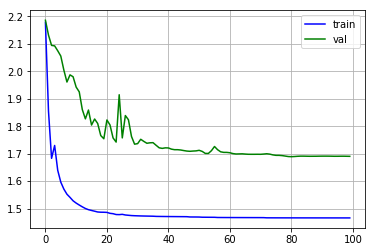

In [75]:
# посмотрим на графики ошибок на тренировочной и валидационной частях

show_history(model.train_history, model.valid_history)

In [76]:
model.evaluate_score(X_test, y_test)

0.807